# Sydney Airbnb

## Abstracto

Este dataset se corresponde a las ofertas de alojamientos en Airbnb en la ciudad de Sydney, en diciembre de 2018. El mismo fue obtenido desde Kaggle, pero la fuente original es InsideAirbnb, un repositorio de datos de la app Airbnb actualizados sobre cualquier ciudad del mundo.

La base de datos contiene información sobre 36.000 alojamientos publicados en Airbnb en la región metropolitana de Sydney y sus características como la descripción, quien es su anfitrión, el barrio en el que esta ubicado, sus coordenadas, el tipo de alojamiento y el precio por noche. También se detalla la cantidad de reseñas totales y por mes, la fecha de la ultima reseña y la cantidad de días en los cuales está disponible por año. Además, podemos encontrar información mucho más detallada sobre cada alojamiento en otros archivos csv que contienen datos sobre la performance de los anfitriones, cantidad y tipos de camas, asi como la cantidad de cuartos y baños, la tarifa de limpieza y de seguridad, los metros cuadrados de la propiedad, los scores de las reseñas, etc.

El objetivo principal de lo que se quiere lograr con esta base de datos es predecir el precio por noche de un alojamiento en base a sus características. Esta estimación puede ser muy útil para los anfitriones de Airbnb a la hora de definir el precio por noche de una nueva publicación que deseen realizar, o la modificación de alguna ya existente. Puede ser especialmente valioso para alguien que no tiene experiencia en Airbnb y no sabe que factores tener en cuenta para definir este precio.

Fuente de datos: https://www.kaggle.com/datasets/tylerx/sydney-airbnb-open-data?select=listings_summary_dec18.csv

Fuente original, con datos actualizados de cualquier ciudad: http://insideairbnb.com/get-the-data/

## Audiencia
El proyecto apunta a ser de utilidad para orientar en la toma de decisiones a las partes interesadas en el negocio de Airbnb ya sea anfitriones actuales y potenciales, viajeros, usuarios en aplicaciones de la competencia como por ejemplo Booking, el mismo Airbnb para ofrecerlo como servicio de cálculo de precio, entre otros.


## Definición del objetivo
A partir de las variables más sensibles de los datos seleccionados, la predicción del precio por noche de un nuevo alojamiento en Airbnb (Sydney) se podría realizar en función de su ubicación, el tipo de alojamiento, la cantidad de reseñas y el barrio de la ciudad en el que se encuentra. A partir de este análisis se podrá comprender mejor el comportamiento y rendimiento de los viajeros y anfitriones en la plataforma, habrá una buena orientación para las iniciativas de marketing y se podrán efectuar recomendaciones para los anfitriones, haciendo que sus alojamientos sean más rentables que antes.

## Contexto comercial
Airbnb es una plataforma en línea que permite a individuos alquilar alojamientos para estancias de corta duración. Es un gran ecosistema de anfitriones e inquilinos que buscan oportunidades para alquilar un espacio de más en su propiedad/alojarse a un precio conveniente mientras se viaja. Incluso los anfitriones con más alojamientos son en su mayoría pequeñas inmobiliarias con una oferta limitada, ya que la plataforma busca proporcionar un servicio personalizado y centrado en la experiencia del cliente. En consecuencia, su capacidad para analizar tendencias a gran escala y establecer precios óptimos es limitada, ya que la mayoría de los anfitriones cuenta con solo un alojamiento publicado y poco conociemiento sobre el mercado en general. De esta manera, no se tiene una certeza de que precio es competitivo para publicar un nuevo alojamiento, teniendo en cuenta las características únicas del mismo.


## Problema comercial 


*   ¿Qué características son más relevantes para el precio por noche de un alojamiento de Airbnb en Sydney?
*   ¿Cómo y a qué precio por noche debería publicar su alojamiento un anfitrión (potencial o existente)?


## Contexto analítico
El dataset seleccionado fue obtenido en Kaggle y se encuentra en formato CSV. Hay información relativa al anfitrión (id, nombre), la ubicación del alojamiento (barrio, latitud, longitud), el tipo de alojamiento, las reseñas (fecha de la última, cantidad por mes), disponibilidad para alquilar al año, etc.


## Preguntas e hipótesis

A continuación se presentan algunas preguntas e hipótesis basadas en las variables del dataset:

1. ¿Hay una relación entre el barrio en el que está ubicado un alojamiento y su precio por noche?
Hipótesis: Es muy probable que algunos barrios más exclusivos, o bien céntricos sean más caros debido a se cercanía  a los sitios turísticos de la ciudad o por otro lado a la exclusividad y lujo de la zona.

2. ¿Hay una relación entre la latitud/longitud de las coordenadas un alojamiento y su precio por noche?
Hipótesis: Además del barrio en el que se ubique, es posible que haya una tendencia generalizada en la cual sea más caro cuanto más al norte/sur y cuanto más cerca de la costa se encuentre, como sucede en muchas ciudades.

3. ¿Hay una relación entre el tipo de alojamiento y su precio por noche?
Hipótesis: Es muy probable que los alojamientos que sean de tipo departamento entero sean más costosos que los de cuarto privado, y estos que los de cuarto compartido.

4. ¿Hay una relación entre la cantidad de reseñas que tiene un alojamiento y su precio por noche?
Hipótesis: Es notorio que los alojamientos con mayor cantidad de reseñas son los más populares, factor que puede influir directamente en el precio si el mismo es muy reservado por su gran relación precio-calidad.

Se importan las librerías que se utilizarán para trabajar con los datos y visualizarlos.

In [521]:
# pandas
import pandas as pd
# matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns
# NumPy
import numpy as np
# scipy
from   scipy import stats
import statsmodels.formula.api as sm
# sklearn
from sklearn.model_selection import train_test_split
# Métricas
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Preprocesamiento de datos
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
# CrossValidation
from sklearn.model_selection import KFold, cross_val_score
# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
# Optimización de hiperparámetros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# WordCloud
from wordcloud import WordCloud, STOPWORDS
# folium (libreria de mapas)
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap


In [522]:
# cambio el estilo de matplotlib para obtener visualizaciones más estéticas
mpl.style.use('bmh')

Se decidió utilizar el archivo con la información más detallada de cada alojamiento de Airbnb, incluyendo detalles del host, de los reviews, de los barrios de la ciudad, siendo un archivo de 96 columnas.

In [523]:
# cargamos el archivo csv con la función de pandas
df = pd.read_csv("syd_listings.csv", sep=",", encoding='Latin-1')
# vemos una primera muestra del dataset
df.head()

C:\Users\lucas.reyser\AppData\Local\Temp\ipykernel_17264\2484012402.py:2: DtypeWarning: Columns (43,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("syd_listings.csv", sep=",", encoding='Latin-1')


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,https://www.airbnb.com/rooms/12351,2.018120e+13,12/7/2018,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one of Australia's top hosts by Airbnb CEO Brian Chesky & key shareholder Ashton Kutcher. We're Sydney's #1 reviewed hosts too). Find out why we've been positively reviewed 500+ times. Message us and talk first BEFORE you make any reservation request - And please read our listing to the end (hint hint). Everything you need to know is there.,"We're pretty relaxed hosts, and we fully appreciate staying with someone else, in their home home, is not for every-one. This is not a business, or a hotel. We're casual Airbnb hosts, not hoteliers. If you're just looking for an alternative to an expensive hotel, then we're not for you. Here you'll be treated in the same way we treat family & friends when they stay. So... no fluffy bathrobes... Please say hello and message us *BEFORE* you make your reservation request... It'll help speed things up, and smooth things out... Please read our listing all the way to the end. It will make getting a confirmed reservation so much easier :) See below (hint hint) -- G'Day from Vinh & Stuart in Sydney! Thanks for coming to check out our listing :) We have another btw... http://www.airbnb.com/rooms/73639 if this one is unavailable ""Sydney City Home with Harbour Views""; our spare room in the attic. Your room: * Private bedroom (with a lockable door) * Queen size bed * All linen, pillows, blankets,","Come stay with Vinh & Stuart (Awarded as one of Australia's top hosts by Airbnb CEO Brian Chesky & key shareholder Ashton Kutcher. We're Sydney's #1 reviewed hosts too). Find out why we've been positively reviewed 500+ times. Message us and talk first BEFORE you make any reservation request - And please read our listing to the end (hint hint). Everything you need to know is there. We're pretty relaxed hosts, and we fully appreciate staying with someone else, in their home home, is not for every-one. This is not a business, or a hotel. We're casual Airbnb hosts, not hoteliers. If you're just looking for an alternative to an expensive hotel, then we're not for you. Here you'll be treated in the same way we treat family & friends when they stay. So... no fluffy bathrobes... Please say hello and message us *BEFORE* you make your reservation request... It'll help speed things up, and smooth things out... Please read our listing all the way to the end. It will make getting a confirmed reserv",none,"Pyrmont is an inner-city village of Sydney, only about 2kms from the Sydney CBD (Central Business District) / Core, right next door to Darling Harbour and Chinatown. https://www.airbnb.com.au/locations/sydney/pyrmont Pyrmont has a relaxed community feel with an inner city vibe. Pyrmont is only about 2kms (10 - 15 mins walk) from the centre of Sydney with an extensive range of local restaurants, wine bars, and pubs. There's some seriously good baristas and cafes right close to our home (Go and say hi to Damien & Tim at Bar Zini - it's one of our local faves). There's five star fine dining right through to greasy-spoon takeaways with some of Australia's finest dining restaurants within easy reach. * Darling Harbour and Cockle Bay * Exhibition and Convention Centres * Sydney Fish Markets * Pyrama Point Park * Jones Bay Wharf * The Star (Casino) with Food Halls, Bars, and the Lyric Theatre * Powerhouse Museum * National Maritime Museum Also (back on the food - notice a theme?): * Two groce",...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,4.83
1,14250,https://www.airbnb.com/rooms/14250,2.018120e+13,12/7/2018,Manly Harbour House,"Beautifully renovated, 

Se deciden eliminar ciertas columnas que no serán de utilidad para el análisis, ya que contienen información con mucho texto, links, etc.

In [524]:
df= df.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'experiences_offered', 'neighborhood_overview', 'neighbourhood', \
         'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url','medium_url', 'picture_url', 'xl_picture_url', 'host_url', \
         'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'neighbourhood_group_cleansed', \
         'state', 'zipcode','market', 'smart_location','country_code','country', 'calendar_updated', 'has_availability', 'availability_30', \
         'availability_60', 'availability_90', 'calendar_last_scraped', 'requires_license', 'license', 'jurisdiction_names', 'weekly_price', \
         'monthly_price', 'host_name', 'description'])
df.head(1)

,id,name,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,Sydney City & Harbour at the door,17061,5/14/2009,within a few hours,100%,f,Pyrmont,2.0,2.0,...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,t,2,4.83


## Data Wrangling

In [525]:
# una muestra del dataset con columnas removidas
df.head()

,id,name,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,Sydney City & Harbour at the door,17061,5/14/2009,within a few hours,100%,f,Pyrmont,2.0,2.0,...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,t,2,4.83
1,14250,Manly Harbour House,55948,11/20/2009,within a few hours,90%,f,Balgowlah,2.0,2.0,...,8.0,10.0,10.0,f,f,strict_14_with_grace_period,f,f,2,0.03
2,15253,Stunning Penthouse Apartment In Heart Of The City,59850,12/3/2009,within an hour,100%,f,Darlinghurst,2.0,2.0,...,9.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,2,3.63
3,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,12/19/2009,within a day,100%,t,Balmain/Birchgrove,2.0,2.0,...,10.0,10.0,9.0,f,f,strict_14_with_grace_period,t,t,1,0.18
4,26174,"COZY PRIVATE ROOM, GREAT LOCATION!",110561,4/19/2010,NaN,NaN,f,Bellevue Hill,1.0,1.0,...,10.0,10.0,9.0,f,f,moderate,f,f,1,0.45


In [526]:
# tamaño del dataset
df.shape

(36662, 53)

In [527]:
# columnas del dataset
df.columns

Index(['id', 'name', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood_cleansed', 'city', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_po

In [528]:
# vemos su estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36662 entries, 0 to 36661
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                36662 non-null  int64  
 1   name                              36650 non-null  object 
 2   host_id                           36662 non-null  int64  
 3   host_since                        36656 non-null  object 
 4   host_response_time                18778 non-null  object 
 5   host_response_rate                18778 non-null  object 
 6   host_is_superhost                 36656 non-null  object 
 7   host_neighbourhood                24844 non-null  object 
 8   host_listings_count               36656 non-null  float64
 9   host_total_listings_count         36656 non-null  float64
 10  host_verifications                36662 non-null  object 
 11  host_has_profile_pic              36656 non-null  object 
 12  host

In [529]:
# Me fijo cuantos datos nulos hay por columna
df.isnull().sum()

id                                      0
name                                   12
host_id                                 0
host_since                              6
host_response_time                  17884
host_response_rate                  17884
host_is_superhost                       6
host_neighbourhood                  11818
host_listings_count                     6
host_total_listings_count               6
host_verifications                      0
host_has_profile_pic                    6
host_identity_verified                  6
street                                  0
neighbourhood_cleansed                  0
city                                   29
latitude                                0
longitude                               0
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                              19
bedrooms                          

In [530]:
# analizo porcentaje de nulos por columna
pd.set_option('display.max_rows', None) 
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

square_feet                    99.331733
host_response_time             48.780754
host_response_rate             48.780754
security_deposit               37.008347
review_scores_value            35.996400
review_scores_location         35.988217
review_scores_checkin          35.985489
review_scores_accuracy         35.925481
review_scores_communication    35.887295
review_scores_cleanliness      35.870929
review_scores_rating           35.802739
reviews_per_month              32.559598
last_review                    32.559598
first_review                   32.559598
host_neighbourhood             32.235012
cleaning_fee                   28.743658
beds                            0.106377
city                            0.079101
bathrooms                       0.051825
name                            0.032731
bedrooms                        0.024549
host_identity_verified          0.016366
host_has_profile_pic            0.016366
host_total_listings_count       0.016366
host_listings_co

In [531]:
# elimino columnas con % de nulos > 45%
df= df.drop(columns=['host_response_time', 'host_response_rate', 'square_feet'])
df.head(1)

,id,name,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,Sydney City & Harbour at the door,17061,5/14/2009,f,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews', 'manual_offline', 'offline_government_id', 'government_id', 'work_email']",t,...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,t,2,4.83


Se reemplazan los nulos de las siguientes columnas de reviews con la mediana para no agregar ruido

In [532]:
# Calculo la mediana para cada feature 
median_review_scores_value = np.median(df.review_scores_value)
median_review_scores_location = np.median(df.review_scores_location)
median_review_scores_checkin = np.median(df.review_scores_checkin)
median_review_scores_accuracy = np.median(df.review_scores_accuracy)
median_review_scores_communication = np.median(df.review_scores_communication)
median_review_scores_cleanliness = np.median(df.review_scores_cleanliness)
median_review_scores_rating = np.median(df.review_scores_rating)
median_reviews_per_month = np.median(df.reviews_per_month)

# Fill missing values with medians
df['review_scores_value'] = df['review_scores_value'].fillna(median_review_scores_value)
df['review_scores_location'] = df['review_scores_location'].fillna(median_review_scores_location)
df['review_scores_checkin'] = df['review_scores_checkin'].fillna(median_review_scores_checkin)
df['review_scores_accuracy'] = df['review_scores_accuracy'].fillna(median_review_scores_accuracy)
df['review_scores_communication'] = df['review_scores_communication'].fillna(median_review_scores_communication)
df['review_scores_cleanliness'] = df['review_scores_cleanliness'].fillna(median_review_scores_cleanliness)
df['review_scores_rating'] = df['review_scores_rating'].fillna(median_review_scores_rating)
df['reviews_per_month'] = df['reviews_per_month'].fillna(median_reviews_per_month)


Se reemplaza los nulos con el 0 en las siguientes columnas, dado que se entiende que dichos datos son 0 en la realidad. Por ejemplo los alojamientos con deposito de garantía igual a 0 representan que el anfitrión no solicita el mismo. También podía pasar que no se solicite una tarifa de limpieza, probablemente esté cargado al precio directamente.

In [533]:
df = df.fillna({'security_deposit': 0,
    'first_review': '0',
    'last_review': '0',
    'host_neighbourhood': '0',
    'cleaning_fee': 0})

A los campos restantes se les imputa 0 utilizando también el criterio anterior.

In [534]:
df = df.fillna(0)

Vemos como queda el dataframe modificado.

In [535]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,36662.0,NaN,NaN,NaN,18520829.652256,8473884.00175,12351.0,11704613.5,20273497.0,25244052.5,30593866.0
name,36662,35858,Home away from home,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,36662.0,NaN,NaN,NaN,65616201.864137,63745327.975146,8346.0,15060221.0,41348188.0,105360535.5,229479027.0
host_since,36662,2954,6/22/2015,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,36662,3,f,32144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_neighbourhood,36662,245,0,11818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,36662.0,NaN,NaN,NaN,8.560199,30.491996,0.0,1.0,1.0,2.0,474.0
host_total_listings_count,36662.0,NaN,NaN,NaN,8.560199,30.491996,0.0,1.0,1.0,2.0,474.0
host_verifications,36662,395,"['email', 'phone', 'reviews', 'jumio', 'government_id']",4769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_has_profile_pic,36662,3,t,36559,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Outliers

Ya habiendo tratado en gran parte los datos nulos, pasamos al tratamiento de outliers, ya que hay un gran sesgo debido a algunos alojamientos con precios excesivamente elevados, que no merecen ser tratados en el análisis, ya que son pocos casos muy particulares.

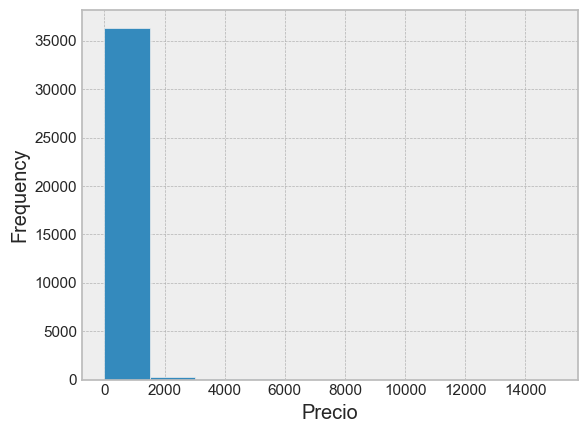

In [536]:
# histograma de precios
df['price'].plot(kind='hist')
plt.xlabel('Precio')
plt.show()

Se observa que practicamente todos los precios estan en la franja entre 0 - 1000 USD la noche, teniendo algunos alojamientos excesivamente caros (hasta 14.000 USD la noche) que dificultan el análisis.

In [537]:
# funcion para aplicar metodo IQR al dataframe
def imputar_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper, # si el valor es mayor al q3
                 df.median(), # reemplazo por la media
                 np.where(df < lower, # en caso contrario, si es menor que el lower limit
                          df.median(), # tambien reemplazar por la media
                          df) # si ninguna de las dos cosas anteriores ocurre, no cambio nada
                 )
   return df

Se aplica la transformacion a las variables relacionadas a lo que paga un viajero por alojarse, es decir el precio, la tarifa de limpieza y el deposito de garantía.

In [538]:
df[['price','cleaning_fee','security_deposit']]=imputar_outliers_IQR(df[['price','cleaning_fee','security_deposit']])
df.head(1)

,id,name,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,Sydney City & Harbour at the door,17061,5/14/2009,f,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews', 'manual_offline', 'offline_government_id', 'government_id', 'work_email']",t,...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,t,2,4.83


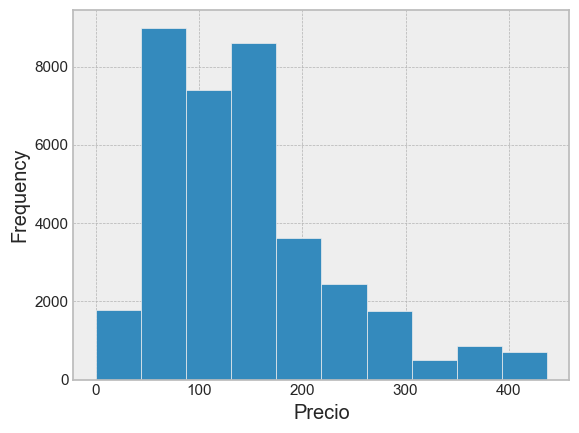

In [539]:
# histograma de precios con df ya modificado
df['price'].plot(kind='hist')
plt.xlabel('Precio')
plt.show()

Se observa una normalización en la forma del histograma, donde se tienen precios más comunes entre 0 - 400 USD por noche.

## Análisis Exploratorio de Datos (EDA)

Comenzaremos haciendo un heatmap de correlaciones, para poder visualizar que variables se correlacionan más con el precio.

C:\Users\lucas.reyser\AppData\Local\Temp\ipykernel_17264\3598649356.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='jet')


Text(0.5, 1.0, 'Heatmap de correlación')

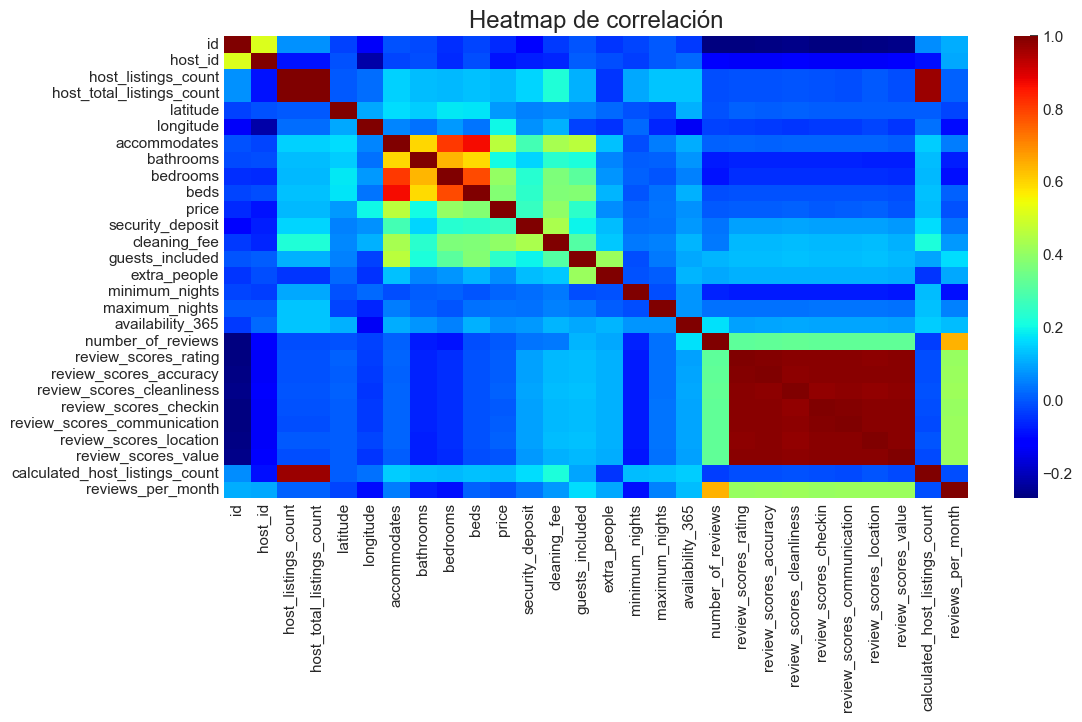

In [540]:
# hago un heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='jet')
plt.title('Heatmap de correlación')

Se procede a hacer un cálculo de las correlaciones, ordenandolas de mayor a menor para ver las más fuertes y confirmar lo visualizado en el heatmap.

In [541]:
# calculo estas correlaciones para ver las más fuertes
corr    = df.corr()
pos_cor = corr['price'] >0
neg_cor = corr['price'] <0
corr['price'][pos_cor].sort_values(ascending = False).round(2)

C:\Users\lucas.reyser\AppData\Local\Temp\ipykernel_17264\3542821052.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr    = df.corr()


price                             1.00
accommodates                      0.46
bedrooms                          0.40
cleaning_fee                      0.40
beds                              0.38
security_deposit                  0.26
guests_included                   0.25
bathrooms                         0.21
longitude                         0.20
calculated_host_listings_count    0.12
host_total_listings_count         0.12
host_listings_count               0.12
latitude                          0.08
availability_365                  0.07
extra_people                      0.06
maximum_nights                    0.04
minimum_nights                    0.02
review_scores_location            0.01
review_scores_cleanliness         0.01
review_scores_rating              0.01
review_scores_accuracy            0.01
review_scores_communication       0.00
review_scores_checkin             0.00
number_of_reviews                 0.00
Name: price, dtype: float64

Se entiende que las variables accommodates, bedrooms, cleaning fee, beds y otras más son las que más correlacionadas con el precio están, aunque ninguna supera el 0.5 de correlación. Hay que entender la diferencia entre esto y la causalidad, donde hay una relación recíproca entre estas variables y el precio, y no una relación causa-efecto.

A continuación se hará un análisis de las palabras más frecuentes en los nombres de los alojamientos. Se procede a realizar un WordCloud que haga una visualización apropiada para lo que se quiere estudiar.

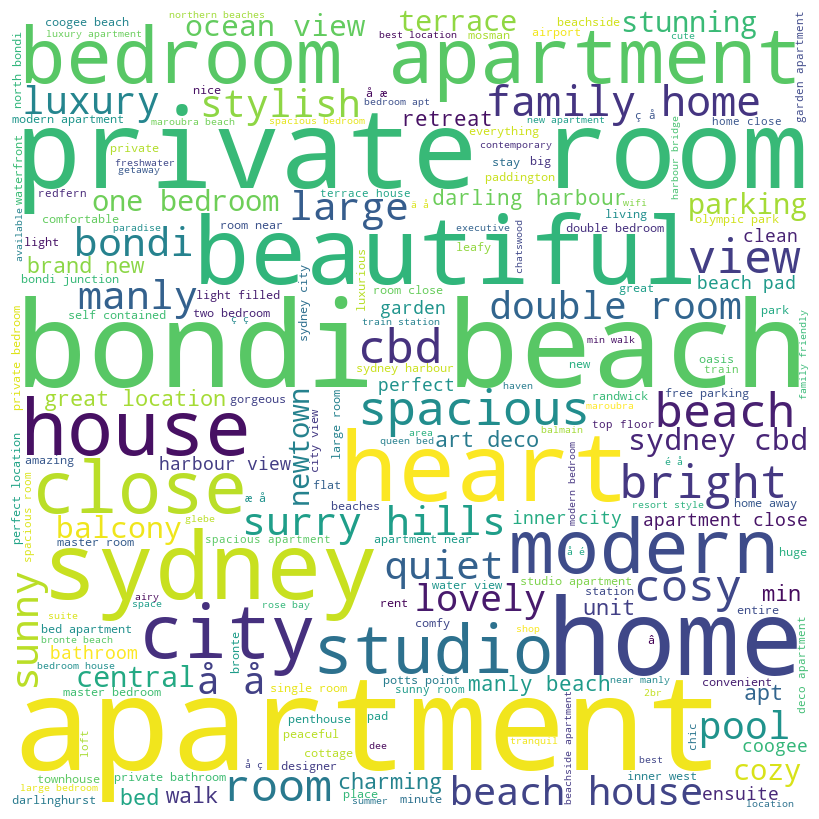

In [542]:
comment_words = ''
stopwords = set(STOPWORDS)

# seleccionar la columna bajo estudio
for val in df.name:
	
	# cambiar todo a str
	val = str(val)

	# separar cada valor
	tokens = val.split()
	
	# convertir los tokens en minusculas
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# devolver la imagen con la nube de palabras					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Para poder hacer un análisis de las columnas con textos, analizo la tendencia general de las palabras que usan los anfitriones para publicar sus alojamientos. Las palabras más utilizadas (aparte de "apartment", "private room", "home") son "beautiful", "bondi beach", "heart", "beach house", "spacious", "bright", entre otras. Con estas palabras se busca apelar a mostrar características atractivas en alojamientos temporarios, refieriendose con adjetivos que los presentan con buena ubicación, espaciosos, cerca de la playa, etc.

Ahora se procede a analizar las palabras más frecuentes que denotan alguna característica particular sobre el alojamiento, para ver como estas afectan en el precio por noche. Se elige remover las palabras frecuentes que no representan caracteristicas distintivas ('apartment', 'room', 'bedroom', 'sydney', 'home', 'private', 'house').
Para el análisis se obtendra un precio promedio por grupo, para analizar si hay diferencias significativas entre estos debido al uso de cada palabra.

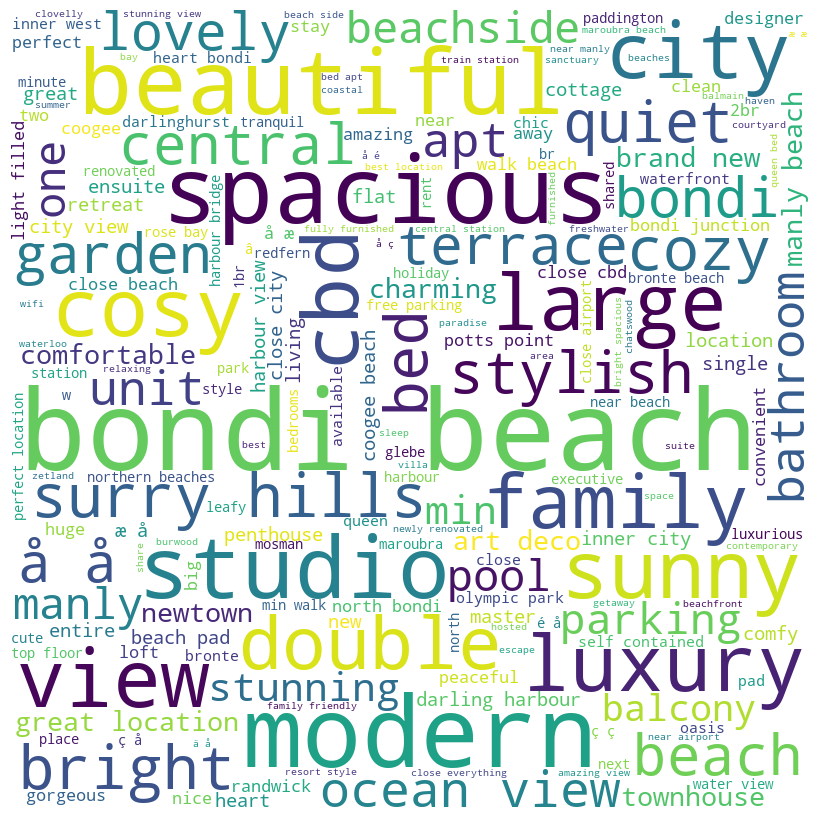

Top palabras más frecuentes:
beach: Frecuencia = 5604, Precio promedio = 162.6220556745182
bondi: Frecuencia = 3355, Precio promedio = 153.55409836065573
modern: Frecuencia = 2035, Precio promedio = 154.12874692874692
city: Frecuencia = 2013, Precio promedio = 149.45355191256832
close: Frecuencia = 1917, Precio promedio = 131.48461137193533
spacious: Frecuencia = 1718, Precio promedio = 150.75902211874273
studio: Frecuencia = 1543, Precio promedio = 126.20414776409592
near: Frecuencia = 1498, Precio promedio = 128.38518024032044
views: Frecuencia = 1491, Precio promedio = 178.682092555332
cbd: Frecuencia = 1393, Precio promedio = 151.3653984206748


In [543]:
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['apartment', 'room', 'bedroom', '-', 'sydney', 'home', 'private', 'house', '2', '&'])
top_words_count = 10  # Número de palabras más frecuentes a obtener

word_freq = {}  # frecuencia de palabras
price_sum = {}   # suma de precios por palabra
price_count = {}  # conteo de filas por palabra

# Iterar de cada balor en la columna "name"
for val, price in zip(df.name, df.price):

    val = str(val)
    tokens = val.split()

    for token in tokens:
        token = token.lower()
        if token not in stopwords:
            if token in word_freq:
                word_freq[token] += 1
                price_sum[token] += price
                price_count[token] += 1
            else:
                word_freq[token] = 1
                price_sum[token] = price
                price_count[token] = 1

            comment_words += token + " "

# Creación de la WordCloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

top_words = sorted(word_freq.keys(), key=lambda x: word_freq[x], reverse=True)[:top_words_count]

# promedio de la columna 'price' para cada palabra
average_prices = {}
for word in top_words:
    average_prices[word] = price_sum[word] / price_count[word]

print("Top palabras más frecuentes:")
for word in top_words:
    print(f"{word}: Frecuencia = {word_freq[word]}, Precio promedio = {average_prices[word]}")

In [544]:
dfwords = pd.DataFrame.from_dict(average_prices, orient='index')
dfwords= dfwords.rename(columns= {0:"PricePerWord"})
dfwords= dfwords.sort_values(by='PricePerWord', ascending=False)

Haremos un grafico de barras para poder ver la diferencia entre cada promedio de precios calculado.

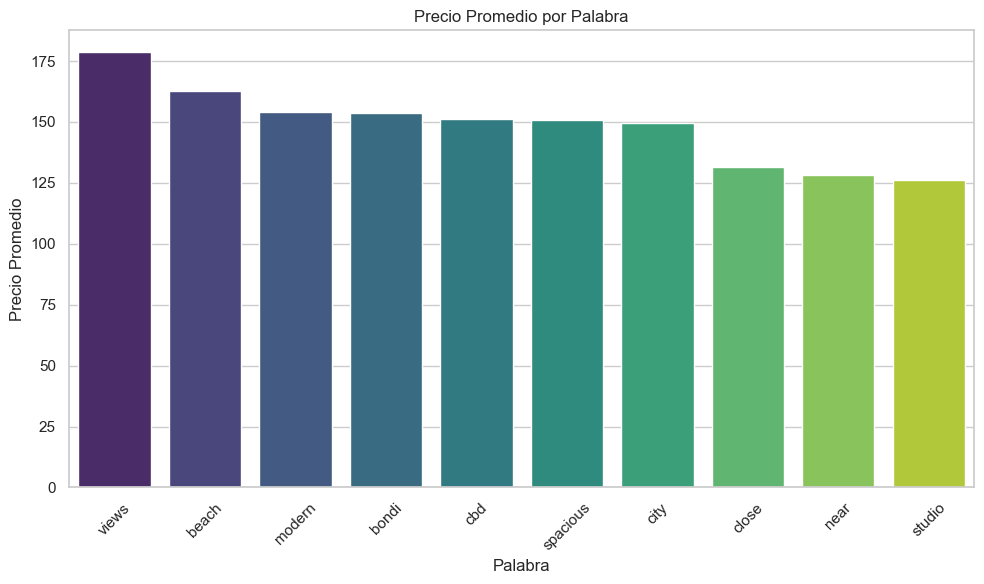

In [545]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=dfwords.index, y="PricePerWord", data=dfwords, palette="viridis")
plt.xlabel('Palabra')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Palabra')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se puede observar que la palabra "views" tiene un precio promedio más alto que el resto, lo cual tiene sentido porque un alojamiento con buenas vistas siempre es más caro. Es lógico en este caso que el uso de esta palabra, denota una característica por la cual la gente está dispuesta a pagar más.

## Preguntas e hipótesis

A continuación trataremos de aproximar una respuesta basada en los datos a cada una de las preguntas planteadas inicialmente:

1. ¿Hay una relación entre el barrio en el que está ubicado un alojamiento y su precio por noche?
Hipótesis: Es muy probable que algunos barrios más exlusivos, o bien céntricos sean más caros debido a se cercanía  a los sitios turísticos de la ciudad o por otro lado a la exclusividad y lujo de la zona.

2. ¿Hay una relación entre la latitud/longitud de las coordenadas un alojamiento y su precio por noche?
Hipótesis: Además del barrio en el que se ubique, es posible que haya una tendencia generalizada en la cual sea más caro cuanto más al norte/sur y cuanto más cerca de la costa se encuentre, como sucede en muchas ciudades.

3. ¿Hay una relación entre el tipo de alojamiento y su precio por noche?
Hipótesis: Es muy probable que los alojamientos que sean de tipo departamento entero sean más costosos que los de cuarto privado, y estos que los de cuarto compartido.

4. ¿Hay una relación entre la cantidad de reseñas que tiene un alojamiento y su precio por noche?
Hipótesis: Es notorio que los alojamientos con mayor cantidad de reseñas son los más populares, factor que puede influir directamente en el precio si el mismo es muy reservado por su gran relación precio-calidad.

* Respondiendo a la Pregunta 1: ¿Hay una relación entre el barrio en el que está ubicado un alojamiento y su precio por noche?

Calcularemos el precio promedio por noche de cada barrio de Sydney, ordenandolos de mayor a menor

In [546]:
# Calculo el precio promedio (por noche) de cada barrio de Sydney
priceperneighbourhood = df.groupby('neighbourhood_cleansed').price.mean()
# Ordeno de mayor a menor
PPNsorted = priceperneighbourhood.round(2).sort_values(ascending=False)
PPNsorted

neighbourhood_cleansed
Pittwater           178.28
Manly               176.06
Mosman              165.40
Woollahra           160.13
Leichhardt          158.56
Waverley            157.31
Warringah           156.44
North Sydney        149.81
Sydney              148.69
Hunters Hill        148.38
Sutherland Shire    143.90
Auburn              141.49
Randwick            135.84
Willoughby          134.74
Ku-Ring-Gai         131.88
Canada Bay          129.27
Lane Cove           127.76
Penrith             121.83
Liverpool           119.49
Campbelltown        114.39
Marrickville        112.78
Rockdale            111.71
Hornsby             109.46
The Hills Shire     108.15
Botany Bay          106.90
Hurstville          105.49
Ryde                103.56
Ashfield            103.46
Canterbury          101.08
Parramatta           98.77
Burwood              95.60
Camden               95.55
City Of Kogarah      94.99
Strathfield          93.77
Holroyd              90.25
Bankstown            89.27
Black

In [547]:
df['price'].mean()

143.5340406960886

In [548]:
priceperneighbourhood.mean()

123.12965408666717

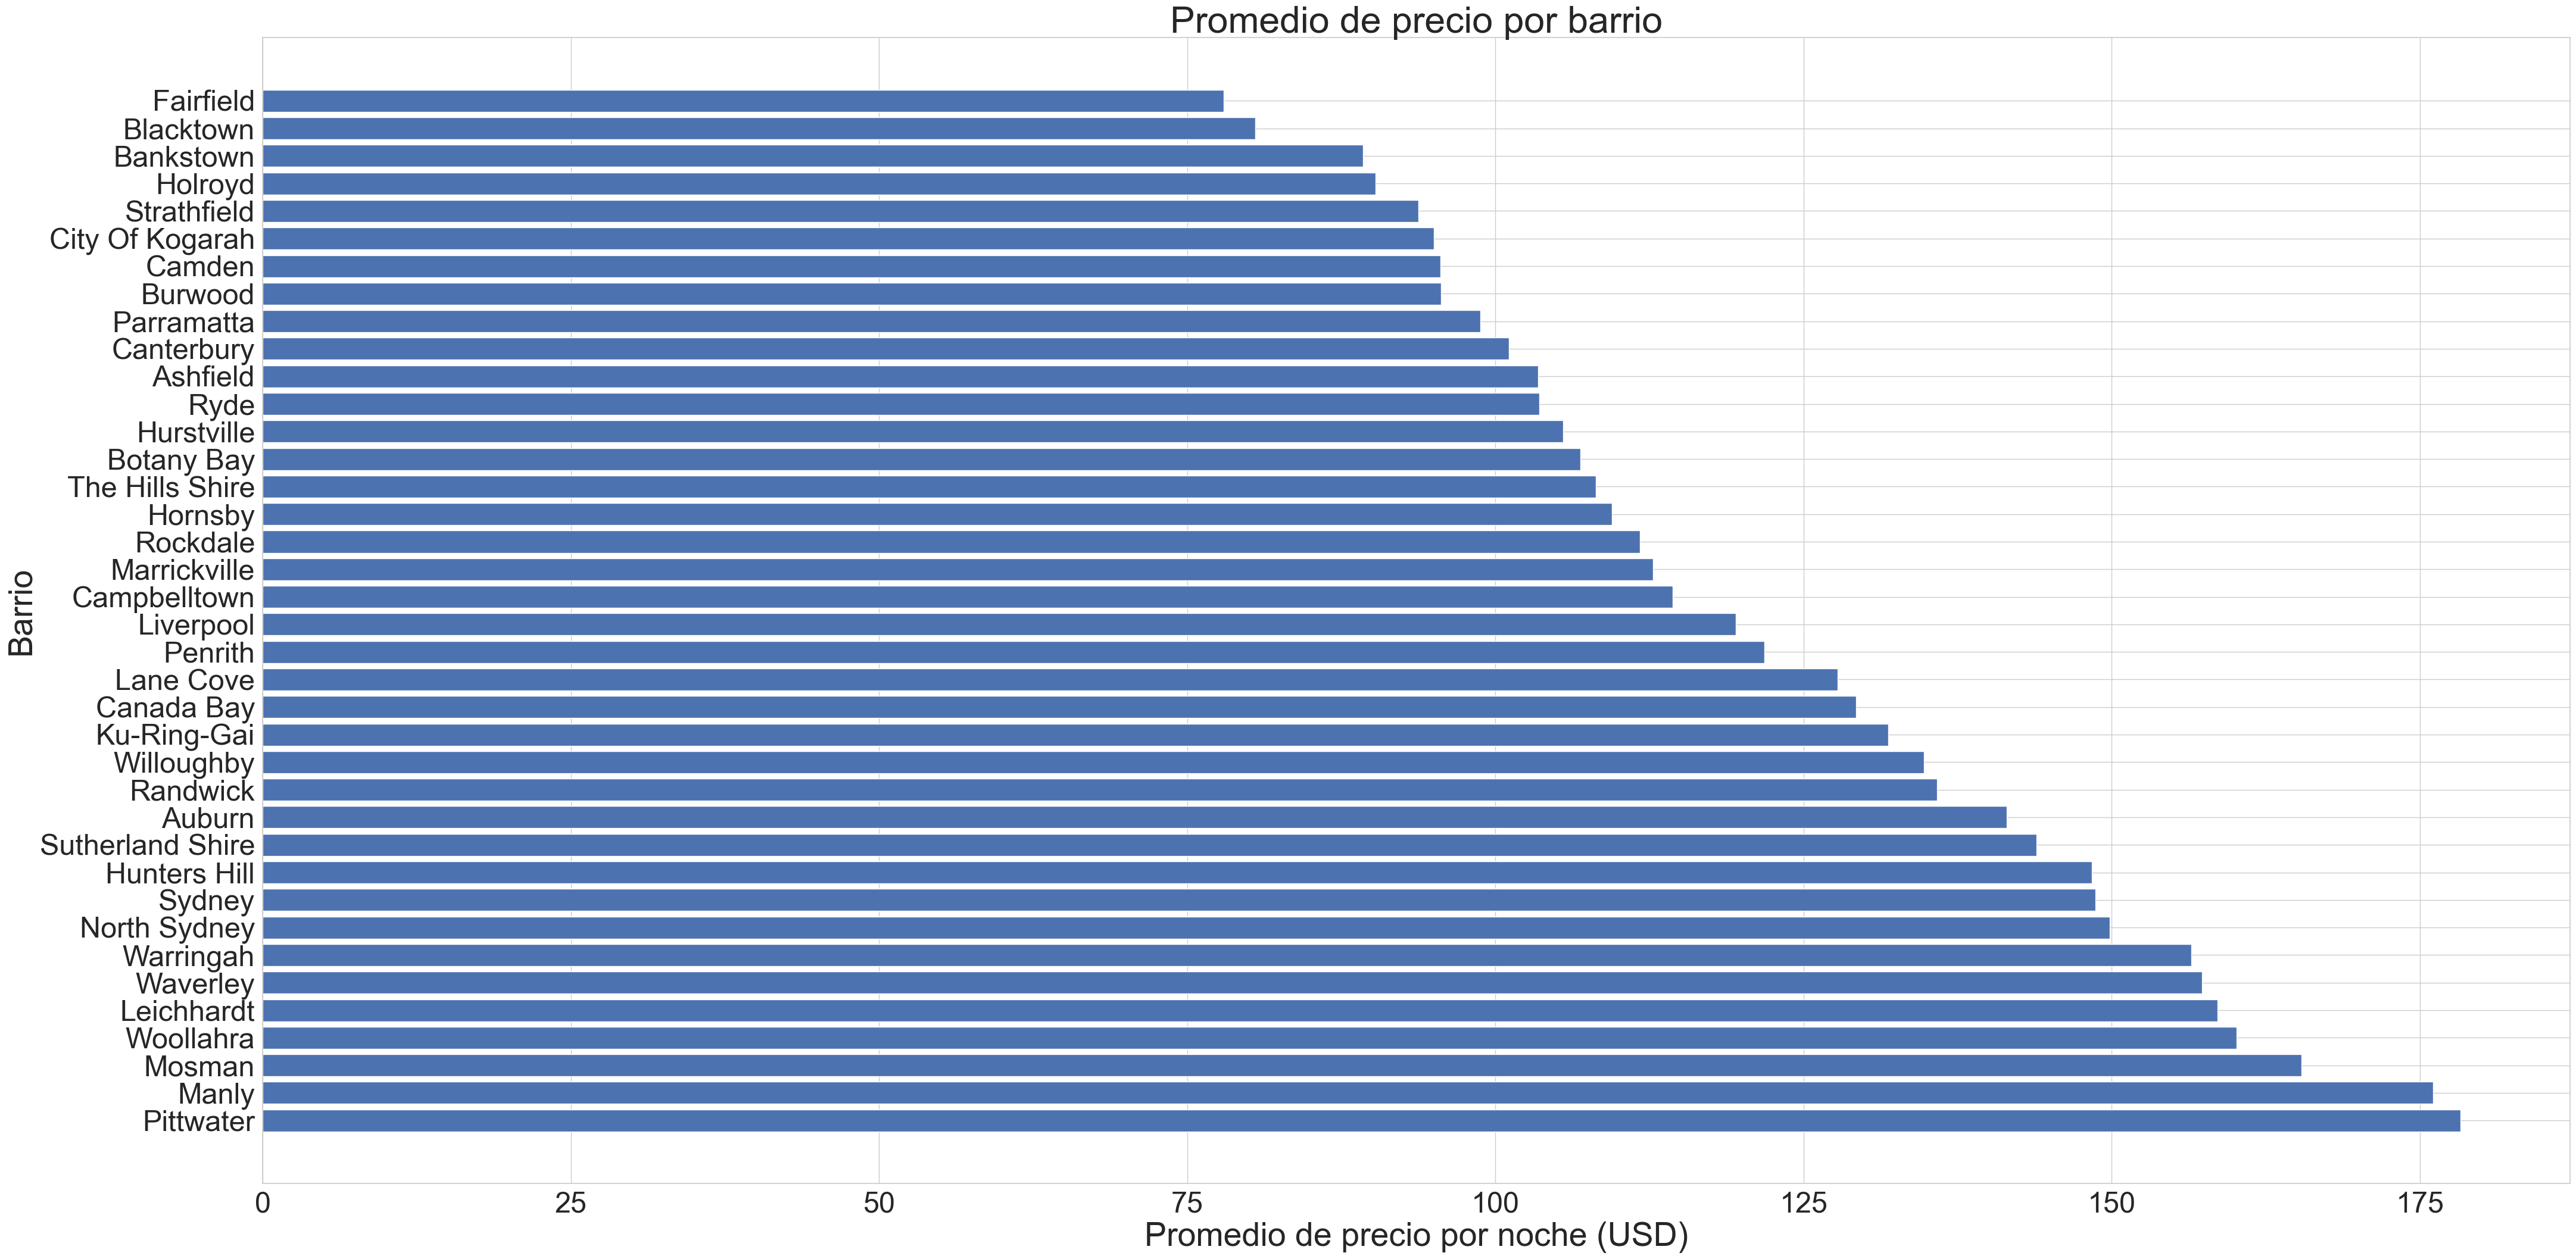

In [549]:
# Hago un grafico de barras con el precio promedio por barrio
fig, ax = plt.subplots(figsize=(50,25))
ax.barh(PPNsorted.index, PPNsorted.values)
ax.set_title('Promedio de precio por barrio', fontsize= 45)
ax.set_ylabel('Barrio', fontsize= 40)
ax.set_xlabel('Promedio de precio por noche (USD)', fontsize= 40)
ax.tick_params(axis='both', labelsize=35)

Los barrios de Pittwater y Manly tiene un precio promedio significativamente más elevado que los demás.

Se puede deducir que ciertos barrios tienen la posibilidad de definir precios muy altos debido a su exclusividad, en lugares ciertamente lujosos en las afueras de la ciudad.

Luego se encuentran barrios mas bien céntricos donde se encuentran los mayores puntos turísticos de la ciudad, oficinas, etc.

* Respondiendo a la Pregunta 2: ¿Hay una relación entre la latitud/longitud de las coordenadas un alojamiento y su precio por noche?

En este caso limitaremos el dataframe, filtrando precios menores a 400 para analizar rangos "normales" de precios y que la escala de colores en el mapa sea de utilidad.

In [550]:
# filtro dataframe
df_map = df[df['price'] < 400]

Genero un scatterplot que representa las ubicaciones de los alojamientos con una escala de colores acorde al precio de cada uno.

Text(0, 0.5, 'Longitud')

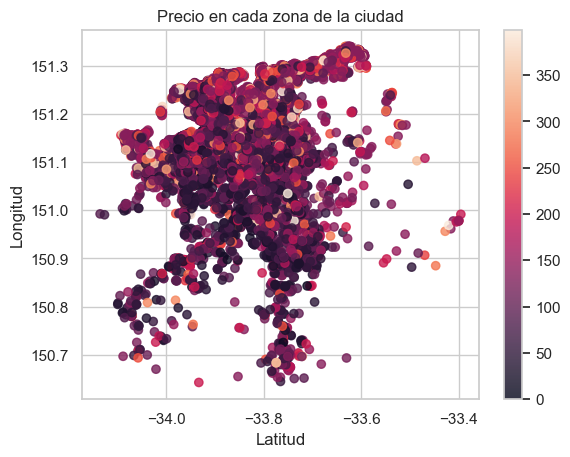

In [551]:
fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(df_map['latitude'], df_map['longitude'], c=df_map['price'], alpha= 0.8)
fig.colorbar(mapeo_colores)
ax.set_title('Precio en cada zona de la ciudad')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')

Se puede observar en el mapa una gran variabilidad en cuanto a los precios en las distintas zonas de la ciudad, pero claramente los precios más elevados estan en el norte de Sydney. Como se vio anteriormente, los barrios con mayores precios promedio fueron Pittwater y Mosman, entre otros, y no es casualidad que estos se hallen en el norte.

A continuación visualizamos la distribución de precios en relación sur-norte para reafirmar el insight observado en el mapa (scatterplot) anterior.

Text(0.5, 1.0, 'Precios por noche en función de la longitud (sur-norte)')

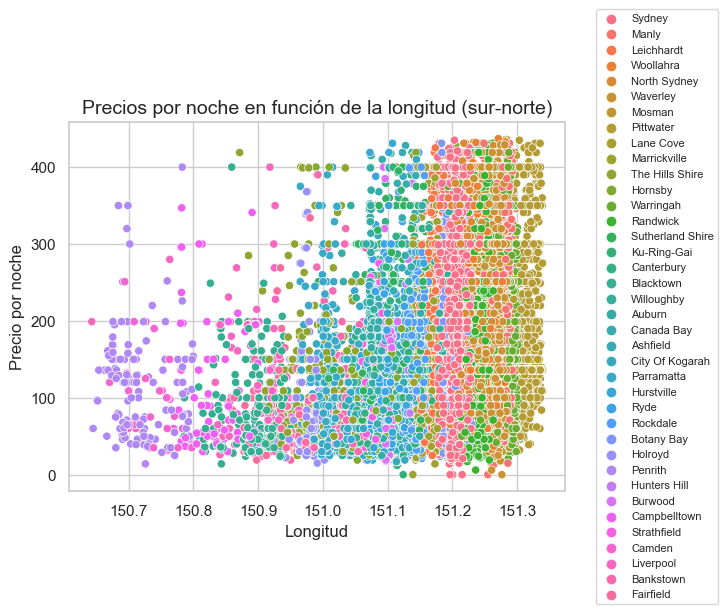

In [552]:
# line chart para los precios en relacion norte-sur
linea = sns.scatterplot(data=df, x="longitude", y="price", hue='neighbourhood_cleansed')
linea.set_xlabel('Longitud')
linea.set_ylabel('Precio por noche')
linea.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), prop={'size': 8})
plt.title("Precios por noche en función de la longitud (sur-norte)", fontsize=14)

Se observa como los listings del norte alcanzan precios mayores en general, con algunos picos en alojamientos bien céntricos.

* Respondiendo a la Pregunta 3: ¿Hay una relación entre el tipo de alojamiento y su precio por noche?

En esta pregunta analizaremos como impacta el tipo de alojamiento en su precio, mejor representado con un boxplot que muestre la distribución de cada uno.

In [553]:
# vemos la media para cada tipo de alojamiento
df[['room_type', 'price']].groupby('room_type').mean()

,price
room_type,
Entire home/apt,180.865870
Private room,82.714449
Shared room,51.448331


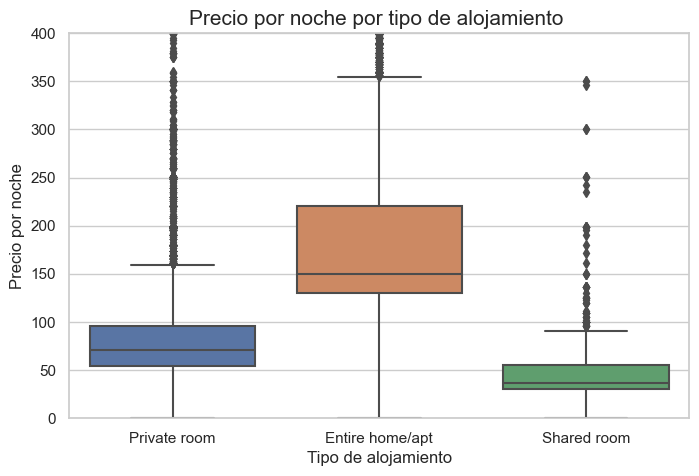

In [554]:
# Hago un gráfico boxplot

plt.figure(figsize=(8,5))
box1 = sns.boxplot(x='room_type', y='price', data = df) 
plt.title("Precio por noche por tipo de alojamiento ", fontsize=15)
plt.ylim(bottom=0, top=400)
box1.set_xlabel('Tipo de alojamiento', fontsize=12)
box1.set_ylabel('Precio por noche', fontsize=12)
plt.show()

Se puede observar que los precios por noche en los alojamientos que son departamentos enteros son significativamente mayores a los de un cuarto privado, y mayores aún que los cuartos compartidos. Habria que realizar un test de hipotesis para inferir sobre la media de precio por noche en cada tipo de alojamiento, haciendo comparaciones de medias.

* Respondiendo a la Pregunta 4: ¿Hay una relación entre la cantidad de reseñas que tiene un alojamiento y su precio por noche?

En este apartado se trata de estudiar como la popularidad y la demanda de ciertos alojamientos inlfuye en su precio, detectar si hay cuanto más popular es un Airbnb más caro es, probablemente tambien relacionado a su ubicación. Representaremos esto con un scatterplot que ubica los más populares con su latitud y longitud.

In [555]:
# filtramos por las columnas relacionadas a cantidad de reseñas e identificación
dfaux = df[['id', 'neighbourhood_cleansed', 'number_of_reviews', 'reviews_per_month', 'price', 'latitude', 'longitude']].sort_values(by= 'number_of_reviews', ascending=False)
dfscat = dfaux.iloc[0:200]
dfscat.head()

,id,neighbourhood_cleansed,number_of_reviews,reviews_per_month,price,latitude,longitude
0,12351,Sydney,493,4.83,100.0,-33.865153,151.191896
467,898906,Pittwater,475,6.68,115.0,-33.621014,151.336106
5256,7944819,Botany Bay,474,12.80,84.0,-33.921516,151.190089
144,389876,Sydney,443,5.46,136.0,-33.889261,151.201722
10088,12954762,Rockdale,425,14.00,57.0,-33.937002,151.152735


Text(0, 0.5, 'Longitud')

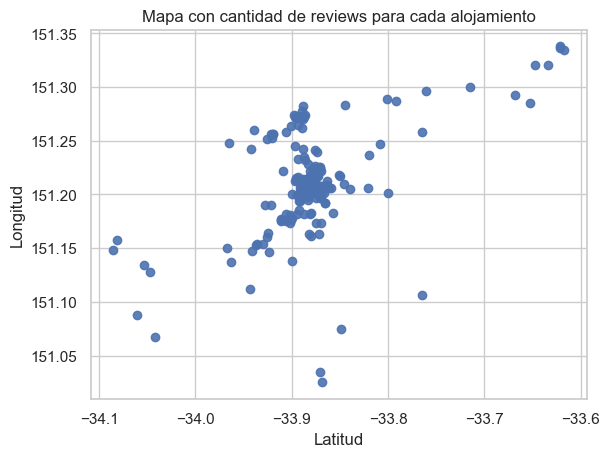

In [556]:
# Scatterplot para detectar los alojamientos más frecuentados y calificados
# con matplotlib

fig, ax = plt.subplots()  
mapeo_color = ax.scatter(dfscat['latitude'], dfscat['longitude'], alpha= 0.9)
ax.set_title('Mapa con cantidad de reviews para cada alojamiento')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')

Se observa, como es lógico, que la mayor concentración es en el centro de la ciudad, debido a que los puntos más turísticos se encuentran en esta zona.

Se pueden detectar algunos alojamientos especificos con gran cantidad de reviews, se podria investigar particularmente para entender en detalle por que son tan populares, y si tiene alguna relación el precio. Es posible que estos alojamientos tan frecuentados tengan una muy buena relación precio-calidad, la cual esta cuantificada en los scores de las reviews.

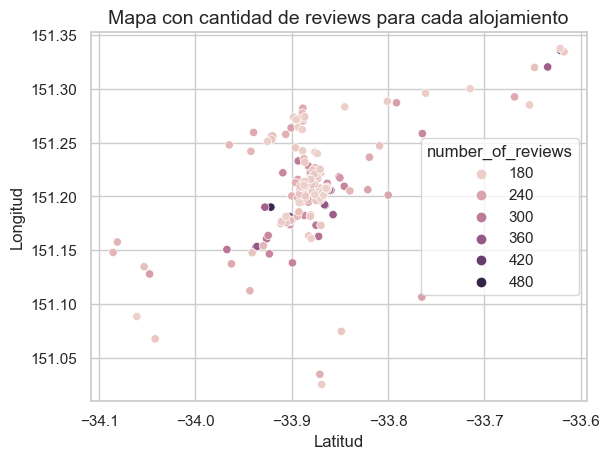

In [557]:
# con seaborn
scat2 = sns.scatterplot(data=dfscat, x="latitude", y="longitude", hue="number_of_reviews")
scat2.set_xlabel('Latitud')
scat2.set_ylabel('Longitud')
plt.title("Mapa con cantidad de reviews para cada alojamiento", fontsize=14)
plt.show()

A continuación analizaremos el alojamiento con más reseñas de toda la ciudad, para entender el caso particular.

In [558]:
max_reviews = df['number_of_reviews'].max()
print('El alojamiento con mayor cantidad de reseñas tiene', max_reviews, 'reseñas')
print('Y es el siguiente:')
maxrev = df[df['number_of_reviews'] == max_reviews]
maxrev


El alojamiento con mayor cantidad de reseñas tiene 493 reseñas
Y es el siguiente:


,id,name,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,Sydney City & Harbour at the door,17061,5/14/2009,f,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews', 'manual_offline', 'offline_government_id', 'government_id', 'work_email']",t,...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,t,2,4.83


In [559]:
pd.set_option('display.max_colwidth', None)
print('A continuación su nombre:', maxrev['name'])
print('Tiene un precio por noche de:', maxrev['price'])

A continuación su nombre: 0    Sydney City & Harbour at the door
Name: name, dtype: object
Tiene un precio por noche de: 0    100.0
Name: price, dtype: float64


Efectivamente es el mejor alojamiento, premiados por el CEO de Airbnb y el actor Ashton Kutcher como el mejor de Australia (se lee en la columna "description", en la primera fila al principio de la notebook). También tiene las mejores reseñas de la ciudad.

### Visualizaciones con la librería Folium: una mejor navegación del mapa

Emplearemos la librería folium para conocer mejor como se distribuyen los alojamientos geográficamente, con mapas especializados y sin la necesidad de utilizar scatterplots.

A contunuación utilizaremos el HeatMap de folium para visualizar un overview de los precios en la ciudad.

In [561]:
max_amount = float(df['price'].max())

folium_hmap = folium.Map(location=[-33.865143, 151.209900],
                        zoom_start=12,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(df['latitude'], df['longitude'], df['price'])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=8, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)

C:\Users\lucas.reyser\AppData\Local\Temp\ipykernel_17264\2754428639.py:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  hm_wide = HeatMap( list(zip(df['latitude'], df['longitude'], df['price'])),


### Conclusiones en base a los insights observados:

Después de realizar el análisis exploratorio de los datos, se pueden sacar las siguientes conclusiones en relación a fijar precios más competitivos en los alojamiento de Airbnb en Sydney:

Si el alojamiento se encuentra en barrios exclusivos como lo son Pittwater, Mosman, Manly, Woollahra y Warringah, sería pertinente considerar que los precios pueden ser muy elevados debido al status que estos barrios poseen, y se entiende que en los mismos se alojan personas con un gran poder adquisitivo que buscan estadías de lujo en las afueras de la ciudad.

Considerar que alojamientos muy céntricos poseen la ventaja de estar bien ubicados para el turismo, lo cual ofrece de por si un plus en el precio sin tener en cuenta las otras características del alojamiento.

Los alojamientos que son departamentos enteros, tienen la posibilidad de establecer precios significativamente más altos que los demás, ya que tienen total privacidad, a diferencia de un cuarto privado dentro de otra propiedad y obviamente más que un cuarto compartido.

En cuanto a la ubicación, también hay una tendencia a precios más elevados en el norte de la ciudad, y más cerca de la costa, lo cual podría ser tenido en cuenta a la hora de fijar un precio.

## Entrenamiento de modelos de ML

In [562]:
df.columns

Index(['id', 'name', 'host_id', 'host_since', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood_cleansed', 'city', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_gue

* Modelo 1: Relación entre precio por noche y barrio

In [563]:
model1 = 'price~neighbourhood_cleansed'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     67.46
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:47:50   Log-Likelihood:            -2.1385e+05
No. Observations:               36662   AIC:                         4.278e+05
Df Residuals:                   36624   BIC:                         4.281e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

El R2 es muy bajo, lo que indica que solo esta variable no se ajusta a un modelo lineal.

* Modelo 2: Relación entre precio y tipo de alojamiento

In [564]:
model2 = 'price~room_type'
lm2  = sm.ols(formula = model2, data = df).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     8667.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:47:50   Log-Likelihood:            -2.0796e+05
No. Observations:               36662   AIC:                         4.159e+05
Df Residuals:                   36659   BIC:                         4.160e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

R2 sigue siendo bajo como para ajustar los datos a un modelo lineal, pero esta variable genera un mejor poder predictivo que la del modelo anterior.

* Modelo 3: Relación entre precio y muchas variables

In [565]:
model3 = 'price~ bedrooms + beds + bathrooms + accommodates + room_type + bed_type + guests_included + cancellation_policy + cleaning_fee + security_deposit + longitude + calculated_host_listings_count + latitude + availability_365 + extra_people'
lm3   = sm.ols(formula = model3, data = df).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     1076.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:47:51   Log-Likelihood:            -2.0592e+05
No. Observations:               36662   AIC:                         4.119e+05
Df Residuals:                   36639   BIC:                         4.121e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

El R2 llega a un valor cercano a 0.4, lo cual presenta una gran mejora con los anteriores, pero sigue sin ser de mucha utilidad para tener predicciones precisas.

* Modelo 4: Utilizando casi todas las variables

In [566]:
model4 = 'price~ neighbourhood_cleansed+latitude+longitude+room_type+accommodates+bathrooms+bedrooms+beds+bed_type+security_deposit+cleaning_fee+guests_included+extra_people+availability_365+number_of_reviews+review_scores_rating+review_scores_accuracy+review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location+review_scores_value+instant_bookable+is_business_travel_ready+cancellation_policy+require_guest_profile_picture+require_guest_phone_verification+calculated_host_listings_count+reviews_per_month'
lm4   = sm.ols(formula = model4, data = df).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     358.9
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:47:52   Log-Likelihood:            -2.0537e+05
No. Observations:               36662   AIC:                         4.109e+05
Df Residuals:                   36590   BIC:                         4.115e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

El R2 supera la barrera del 0.4, pero seguimos sin poder ajustar bien las variables al modelo de regresión.

A continuación se entrenará el modelo LinearRegression de sklearn, dividiendo el dataset en train y test, y evaluandolo con las métricas adecuadas,

### LinearRegression

Separo dataset entre conjunto de train y conjunto de test:

In [567]:
# se eligen las variables independientes en X, seleccionando features numericos
X= df.select_dtypes(include=['int64', 'float64', 'uint8'])
X.drop('price', axis=1, inplace=True)
# se define la variable dependiente, el precio
y= df['price']

In [568]:
X.shape

(36662, 27)

In [569]:
# Separacion en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [570]:
# Entrenamiento del modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train, y_train)
# Predecir con X_test
y_pred = lr.predict(X_test)

En caso de regresión lineal multiple, el modelo de regresión tiene que encontrar los coeficientes más óptimos para todos los atributos. Para ver qué coeficientes ha elegido nuestro modelo de regresión, ejecutamos el siguiente script:

In [571]:
lr.intercept_

-22226.57885195312

In [572]:
print(X.columns)

Index(['id', 'host_id', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')


Para comparar los valores de salida reales X_test con los valores predichos, convertimos en df:

In [573]:
dferr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dferr['Sesgo']=dferr.Actual -dferr.Predicted
dferr['Error_porc']=((dferr.Actual -dferr.Predicted)/dferr.Actual) *100
dferr.head()

,Actual,Predicted,Sesgo,Error_porc
11857,228.0,212.679848,15.320152,6.719365
4305,65.0,115.271086,-50.271086,-77.340132
24257,46.0,76.540498,-30.540498,-66.392387
28040,80.0,117.687900,-37.687900,-47.109875
273,53.0,117.400060,-64.400060,-121.509547


A continuación el cálculo de las métricas del modelo entrenado.

In [574]:
lr_r2 = r2_score(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",lr_rmse)
print("R^2 Score:",lr_r2)

MAE: 53.10790338456975
MSE: 5128.69777659745
RMSE: 71.61492705154038
R^2 Score: 0.31471189581366577


Las métricas de evaluación del modelo de regresión estarían arrojando resultados que indican un bajo grado de ajuste, sin mucho poder predictivo. Por lo que se debería proceder a elegir otro modelo que se ajuste mejor a los datos.

Se experimentará con un modelo de validación cruzada para ver como performa el modelo con los distintos splits del dataset posibles.

#### Cross Validation con LinearRegression

In [575]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [576]:
model = LinearRegression()  # Puedes utilizar el modelo que elijas aquí

scores = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='r2')

In [577]:
print("Puntuaciones de Validación Cruzada:", scores)
print("Media de las Puntuaciones:", scores.mean())
print("Desviación Estándar de las Puntuaciones:", scores.std())

Puntuaciones de Validación Cruzada: [0.32033252 0.32070591 0.2861907  0.26345308 0.30879625]
Media de las Puntuaciones: 0.2998956920020299
Desviación Estándar de las Puntuaciones: 0.022117140709956455


In [578]:
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
test_score

0.31471189581366577

Se observa como al fraccionar los datos en distintos folds, la performance del modelo cambia, pero no presenta una mejora significativa, sino que el valor de R^2 sigue siendo de 0.3, y se confirma que se deben probar otros modelos de ML.

### Feature Engineering

Se trabajará en las variables categóricas que pueden utilizarse en los modelos con el metodo de OneHotEncoder, para así aumentar el poder predictivo de los modelos a utilizar.

In [579]:
df.columns

Index(['id', 'name', 'host_id', 'host_since', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood_cleansed', 'city', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_gue

In [580]:
#Se crea un dataframe de base para editar y trabajar con Machine Learning
mldf= df

In [581]:
mldf.head(1)

,id,name,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,Sydney City & Harbour at the door,17061,5/14/2009,f,Pyrmont,2.0,2.0,"['email', 'phone', 'manual_online', 'reviews', 'manual_offline', 'offline_government_id', 'government_id', 'work_email']",t,...,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,t,2,4.83


Variables a remover por tratarse de datos sensibles com IDs, nombres, descripciones o listas 

In [582]:
mldf= mldf.drop(columns=['id', 'name', 'host_id', 'host_since', 'minimum_nights', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365','amenities','host_verifications', 'street',
       'availability_365', 'first_review','calculated_host_listings_count', 'city'])

In [583]:
mldf.columns

Index(['host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [584]:
mldf.head(1)

,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,f,Pyrmont,2.0,2.0,t,t,Sydney,-33.865153,151.191896,t,...,9.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,t,t


#### Feature creation

In [585]:
mldf['neighbourhood_cleansed'].value_counts() # One Hot Encoding

Sydney              9241
Waverley            5467
Randwick            3346
Manly               1800
Warringah           1794
Woollahra           1573
North Sydney        1370
Marrickville        1252
Pittwater           1192
Leichhardt           999
Rockdale             729
Botany Bay           600
Ryde                 575
Mosman               534
Parramatta           520
Willoughby           500
Auburn               469
Sutherland Shire     468
Canada Bay           449
Hornsby              391
Ku-Ring-Gai          340
Canterbury           339
Ashfield             306
Lane Cove            289
The Hills Shire      260
Burwood              249
Blacktown            237
Hurstville           195
Bankstown            180
City Of Kogarah      179
Strathfield          171
Penrith              132
Holroyd              125
Liverpool            116
Campbelltown         101
Fairfield             76
Hunters Hill          69
Camden                29
Name: neighbourhood_cleansed, dtype: int64

In [586]:
mldf['room_type'].value_counts() # One Hot Encoding

Entire home/apt    22918
Private room       13115
Shared room          629
Name: room_type, dtype: int64

In [587]:
mldf['property_type'].value_counts() # Reemplazar por otra categoria

Apartment                 21553
House                      9884
Townhouse                  1668
Condominium                 822
Guest suite                 484
Guesthouse                  432
Villa                       293
Loft                        256
Serviced apartment          212
Bed and breakfast           187
Bungalow                    173
Cottage                     123
Boutique hotel              119
Other                       108
Hostel                       97
Cabin                        77
Hotel                        38
Boat                         30
Tiny house                   30
Tent                         12
Camper/RV                    10
Farm stay                     7
Chalet                        7
Aparthotel                    6
Resort                        5
Yurt                          3
Hut                           3
Casa particular (Cuba)        3
Island                        3
Campsite                      3
Earth house                   2
Heritage

In [588]:
mldf['bed_type'].value_counts() #One Hot Encoding

Real Bed         36466
Pull-out Sofa      106
Futon               45
Airbed              28
Couch               17
Name: bed_type, dtype: int64

In [589]:
mldf['cancellation_policy'].value_counts() #One Hot Encoding

strict_14_with_grace_period    15256
flexible                       12919
moderate                        8342
super_strict_60                   81
super_strict_30                   64
Name: cancellation_policy, dtype: int64

In [590]:
mldf['require_guest_phone_verification'].value_counts() # casi el 100% no lo requiere

f    36409
t      253
Name: require_guest_phone_verification, dtype: int64

In [591]:
mldf['require_guest_profile_picture'].value_counts() # casi el 100% no lo requiere

f    36460
t      202
Name: require_guest_profile_picture, dtype: int64

In [592]:
mldf['is_business_travel_ready'].value_counts() # ninguno está listo para business travel

f    36662
Name: is_business_travel_ready, dtype: int64

In [593]:
mldf['host_has_profile_pic'].value_counts() # casi el 100% lo tiene

t    36559
f       97
0        6
Name: host_has_profile_pic, dtype: int64

In [594]:
mldf['host_is_superhost'].value_counts() #One Hot Encoding

f    32144
t     4512
0        6
Name: host_is_superhost, dtype: int64

In [595]:
OHE=['room_type','bed_type','cancellation_policy', 'host_is_superhost', 'property_type']
mldf_OHE=pd.get_dummies(mldf[OHE], columns = OHE)
mldf=mldf.drop(columns=['room_type','bed_type','cancellation_policy', 'host_is_superhost', 'property_type'])
mldf_OHE.head()

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,...,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Villa,property_type_Yurt
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [596]:
# Concatenar las columnas
mldf_final= pd.concat([mldf_OHE, mldf],axis=1)
mldf_final.head(1)

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,0,1,0,0,0,0,0,1,0,0,...,10.0,9.0,10.0,10.0,10.0,10.0,f,f,t,t


In [597]:
# defino nuevas variables independientes
X= mldf_final.select_dtypes(include=['int64', 'float64', 'uint8'])
X.drop('price', axis=1, inplace=True)
y= mldf_final['price']

Split del dataset modificado entre train y test

In [598]:
X.shape

(36662, 77)

In [599]:
# Separacion en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A continuación, utilizaremos distintos modelos de ML de regresión y compararemos su performance para poder elegir el más adecuado.

### Ridge Regression

In [600]:
# Crear y entrenar un modelo de Ridge Regression
model = Ridge(alpha=1.0)  # Puedes ajustar el valor de alpha según sea necesario
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

In [601]:
r_r2 = r2_score(y_test, y_pred)
r_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",r_rmse)
print("R^2 Score:",r_r2)

MAE: 48.325180194689175
MSE: 4441.266489681122
RMSE: 66.6428277437349
R^2 Score: 0.40656532603894957


En primera instancia probamos tecnicas de regularización como el modelo de Ridge que presenta mejores métricas que el LinearRegression. El objetivo en este caso sería utilizar modelos que son capaces de modelar relaciones lineales y no lineales entre las variables predictoras y los resultados.

Buscamos hacer una optimización de hiperparámetros con el modelo Ridge, con las técnicas de GridSearch y RandomizedSearch.

### Optimización de hiperparámetros para Ridge Regressor

#### GridSearch

In [602]:
# Defino el modelo y los hiperparámetros a ajustar
model = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0], 'solver': ['auto', 'svd', 'cholesky']}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)

grid_search.fit(X_train, y_train)

# Obtengo los mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluo el modelo con el set de test
test_score = best_model.score(X_test, y_test)

print("Mejores hiperparámetros: ", best_params)
print("R^2 Score: ", test_score)

Mejores hiperparámetros:  {'alpha': 10.0, 'solver': 'svd'}
R^2 Score:  0.4065069129683204


#### RandomizedSearch
(es más eficiente en términos de tiempo de cómputo que GridSearchCV)

In [603]:
model = Ridge()
param_dist = {'alpha': [0.1, 1.0, 10.0], 'solver': ['auto', 'svd', 'cholesky']}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=5, scoring='r2', cv=5, random_state=42)

# Ajustar el modelo con búsqueda aleatoria
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
best_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
test_score = best_model.score(X_test, y_test)

print("Mejores hiperparámetros: ", best_params)
print("R^2 Score: ", test_score)

Mejores hiperparámetros:  {'solver': 'svd', 'alpha': 10.0}
R^2 Score:  0.4065069129683204


No se logra hacer una buena optimización dado que el R2 Score del modelo no mejora.

### Lasso Regression

In [604]:
# Crear y entrenar un modelo de Lasso Regression
model = Lasso(alpha=1.0)  # Puedes ajustar el valor de alpha según sea necesario
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

In [605]:
l_r2 = r2_score(y_test, y_pred)
l_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",l_rmse)
print("R^2 Score:",l_r2)

MAE: 49.562554629624096
MSE: 4595.918048616358
RMSE: 67.7932006075562
R^2 Score: 0.38590104082491616


La Lasso Regression, el otro modelo de regularización, performa peor que Ridge por lo cual no es una opción superadora.

### Decision Tree

Para decidir el max_depth de el arbol de decisión, es necesario hacer una grafica de R2 vs max_depth para el conjunto de train y test, y definir en que momento el R2 score empieza a diverger entre ambos conjuntos.

In [606]:
dt_train_r2_list = []
dt_test_r2_list = []
for depth in range(1,21):
    dtreg = DecisionTreeRegressor(max_depth=depth)
    dtreg.fit(X_train, y_train)
    y_pred_train = dtreg.predict(X_train)
    dt_train_r2_list.append(r2_score(y_train, y_pred_train))
    y_pred_test = dtreg.predict(X_test)
    dt_test_r2_list.append(r2_score(y_test, y_pred_test))

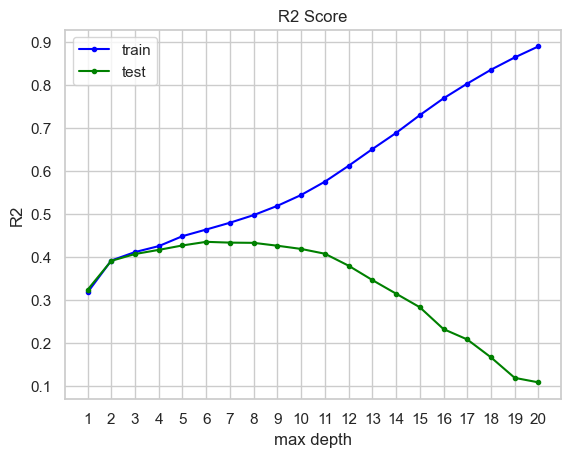

In [607]:
plt.plot(range(1,21), dt_train_r2_list, c='blue', label='train', marker='.')
plt.plot(range(1,21), dt_test_r2_list, c='green', label='test', marker='.')
plt.xticks(range(1,21))
plt.xlabel('max depth')
plt.ylabel('R2')
plt.title('R2 Score')
plt.legend()
plt.show()

Se puede observar en el gráfico que el R2 de entrenamiento sigue aumentando, mientras que el R2 de los datos de test empieza a disminuir cuando la max_depth es superior a 8. Esto se debe a que el DecisionTreeRegressor se sobreajusta y memoriza las peculiaridades de los datos de entrenamiento cuando la max_depth supera 8.

In [608]:
#Arbol de Decision
arbol_de_decision = DecisionTreeRegressor(max_depth=8, random_state = 42) 
#Fit
arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo
y_pred= arbol_de_decision.predict(X_test)

In [609]:
dt_r2 = r2_score(y_test, y_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",dt_rmse)
print("R^2 Score:",dt_r2)

MAE: 45.70947925742574
MSE: 4246.383297448357
RMSE: 65.16427930583102
R^2 Score: 0.43260529547375903


La performance del DecisionTree superior a la alcanzada por el modelo Ridge Regressor, por lo cual ya es una señal de hay espacio de mejora probando más modelos. Sería interesante probar un Random Forest para hacer varias series de arboles de decisión y disminuir el error.

### Random Forest

In [610]:
reg = RandomForestRegressor(max_depth=8, random_state=42, n_estimators=30)
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=30, random_state=42)

In [611]:
# Obtener predicciones
y_pred= reg.predict(X_test)

In [612]:
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",rf_rmse)
print("R^2 Score:",rf_r2)

MAE: 44.435113364656154
MSE: 3980.5890096261346
RMSE: 63.09190922476617
R^2 Score: 0.4681202880780003


El modelo de Random Forest mejora la métrica obtenida por DecisionTree definitivamente.

### GradientBoostingRegressor

In [613]:
# Crear una instancia del modelo
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [614]:
gbr_r2 = r2_score(y_test, y_pred)
gbr_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",gbr_rmse)
print("R^2 Score:",gbr_r2)

MAE: 44.181269128575124
MSE: 3916.450620713089
RMSE: 62.58155176018799
R^2 Score: 0.4766903533964031


En la misma línea que Random Forest, se prueba utilizar GBR para construir iterativamente modelos débiles (arboles de decision) y luego combinar sus predicciones para mejorar la precisión general del modelo. Este modelo alcanza una mejor performance que el anterior.

### LightGBM

In [615]:
# Crear y entrenar un modelo de regresión LightGBM
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1612
[LightGBM] [Info] Number of data points in the train set: 29329, number of used features: 54
[LightGBM] [Info] Start training from score 143.461318


In [616]:
lgb_r2 = r2_score(y_test, y_pred)
lgb_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",lgb_rmse)
print("R^2 Score:",lgb_r2)

MAE: 42.134430369528566
MSE: 3700.9838007644835
RMSE: 60.83571155796966
R^2 Score: 0.5054806730817245


Queda demostrado que LightGBM presenta la mejor performance, con el mayor valor de R^2 significando el mayor grado de ajuste de los datos a un modelo.

## Comparación de modelos

A continuación, se realizará una visualización que compara las métricas de los distintos modelos.

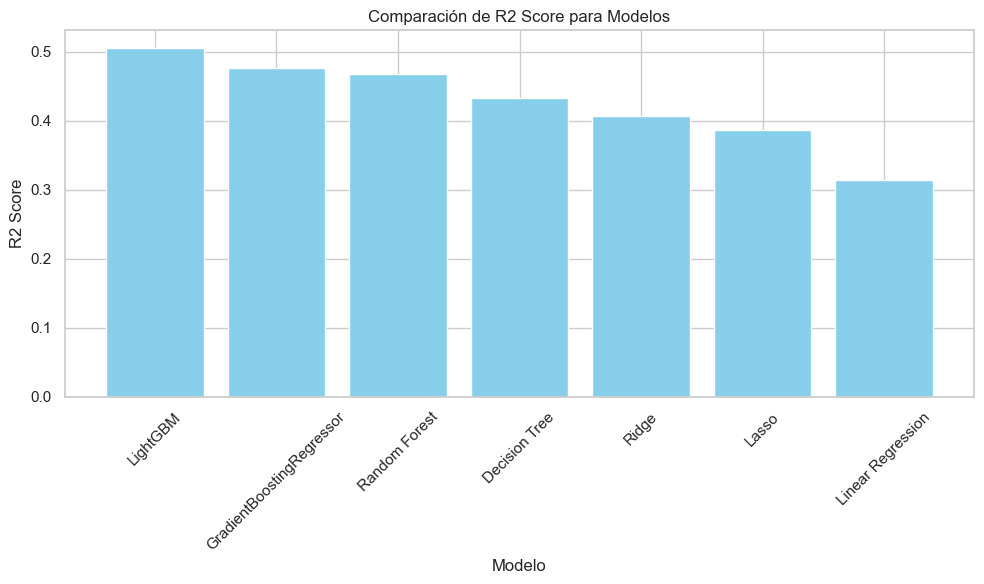

,Modelo,R2 Score
0,LightGBM,0.505481
1,GradientBoostingRegressor,0.476690
2,Random Forest,0.468120
3,Decision Tree,0.432605
4,Ridge,0.406565
5,Lasso,0.385901
6,Linear Regression,0.314712


In [617]:
# Supongamos que tienes una lista de modelos y sus r2_score
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "LightGBM", "Lasso", "Ridge", "GradientBoostingRegressor"]
r2_scores = [lr_r2, dt_r2, rf_r2, lgb_r2, l_r2, r_r2, gbr_r2]

# Crea un DataFrame con los nombres de los modelos y los r2_scores
r2scoresdf = pd.DataFrame({'Modelo': model_names, 'R2 Score': r2_scores}).sort_values(by='R2 Score', ascending=False)
r2scoresdf = r2scoresdf.reset_index(drop=True)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(r2scoresdf['Modelo'], r2scoresdf['R2 Score'], color='skyblue')
plt.xlabel('Modelo')
plt.ylabel('R2 Score')
plt.title('Comparación de R2 Score para Modelos')
plt.xticks(rotation=45)
plt.tight_layout()

# Muestra el gráfico
plt.show()
r2scoresdf

En el gráfico de barras se aprecia como los modelos van mejorando su poder predictivo, desde el más básico hasta el más complejo. Se logra alcanzar un R2 un poco mayor a 0.5 gracias al uso del modelo LightGBM.

A continuación se ven los errores cuadraticos medios (la raíz), que coinciden en el orden con la métrica de R2, LightGBM es el modelo con menor error.

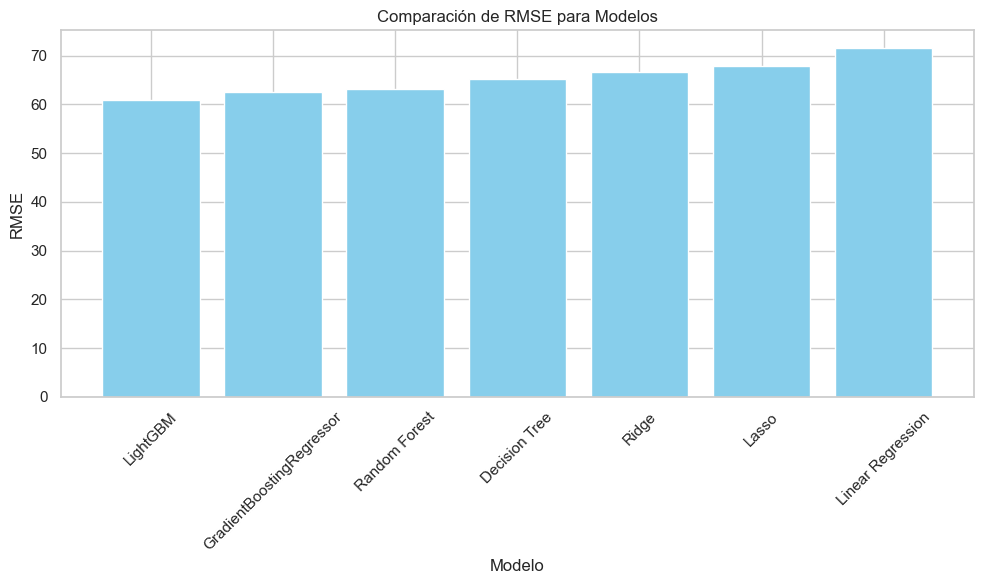

,Modelo,RMSE
0,LightGBM,60.835712
1,GradientBoostingRegressor,62.581552
2,Random Forest,63.091909
3,Decision Tree,65.164279
4,Ridge,66.642828
5,Lasso,67.793201
6,Linear Regression,71.614927


In [618]:
# Supongamos que tienes una lista de modelos y sus RMSE
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "LightGBM", "Lasso", "Ridge", "GradientBoostingRegressor"]
rmse_list = [lr_rmse, dt_rmse, rf_rmse, lgb_rmse, l_rmse, r_rmse, gbr_rmse]

# Crea un DataFrame con los nombres de los modelos y los RMSE
rmsedf = pd.DataFrame({'Modelo': model_names, 'RMSE': rmse_list}).sort_values(by='RMSE', ascending=True)
rmsedf = rmsedf.reset_index(drop=True)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(rmsedf['Modelo'], rmsedf['RMSE'], color='skyblue')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.title('Comparación de RMSE para Modelos')
plt.xticks(rotation=45)
plt.tight_layout()

# Muestra el gráfico
plt.show()
rmsedf

## Conclusión

En conclusión, el coeficiente R^2 de 0.5 obtenido en este proyecto de Data Science indica un rendimiento moderado en la capacidad de predicción del modelo. Para evaluar si este valor es aceptable o no, es importante considerar el contexto específico en el que será usado el modelo.

En general, un R^2 de 0.5 significa que aproximadamente la mitad de la variabilidad en los precios de los alojamientos puede ser explicada por los features incluidos en el modelo. Esto sugiere que el modelo es capaz de captar la escencia de las relaciones entre las características predictoras y los precios de los alojamientos, lo que podría ser útil para una estimación aproximada de precios en el mercado de alquileres de corta duración en Sydney.

Sin embargo, en aplicaciones donde se requiere una precisión más alta, como en la toma de decisiones críticas para un negocio o la competencia en un mercado altamente competitivo, un R^2 de 0.5 podría considerarse insuficiente. En estos casos, sería útil explorar estrategias adicionales para mejorar la capacidad predictiva del modelo, como la inclusión de más variables explicativas, la selección de algoritmos de Machine Learning más avanzados o una mejor optimización de los hiperparámetros del modelo.

De esta manera la herramienta podría ser de utilidad en aplicaciones donde no se deban tomar decisiones críticas, pero que ayuden a un nuevo o potencial anfitrión a publicar su alojamiento con mayor confianza y competitividad en el mercado. Para este nuevo anfitrión, el proceso de determinar un precio adecuado puede ser desafiante, ya que involucra muchas variables, como la ubicación, el tamaño del alojamiento, las comodidades ofrecidas y la demanda actual del mercado, y pueden usar esta herramienta como un punto de partida. Luego, a medida que adquieran experiencia y obtengan retroalimentación de los huéspedes, pueden ajustar sus precios de manera más personalizada.

En resumen, un modelo con un R^2 de 0.5 puede ser una herramienta muy útil para nuevos o potenciales anfitriones de Airbnb en Sydney, ya que les brinda una base confiable para establecer precios iniciales competitivos y les ayuda a sentirse más seguros en el inicio del proceso de publicación de sus alojamientos en la plataforma.